In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read data

In [20]:
data = pd.read_csv("ex1data2.txt", names = ['Size', 'Rooms', 'Price'])
data.head()

,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


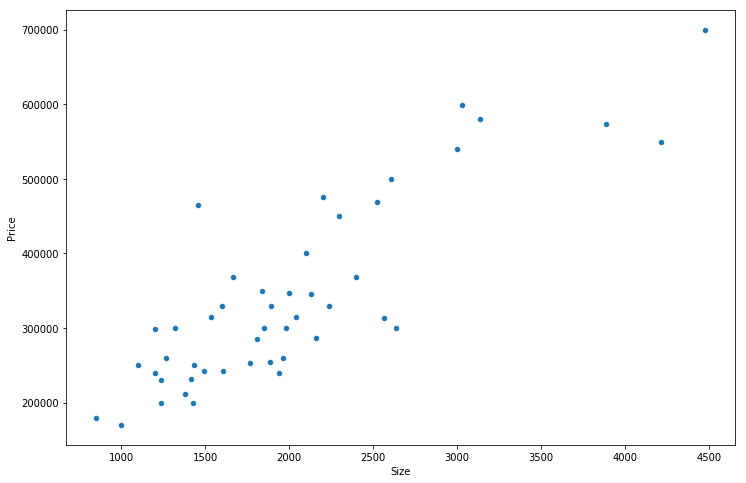

In [21]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize=(12, 8))

# 2. Extract the data

In [22]:
data = (data - data.mean()) / data.std()
data.head()
data.insert(0, 'theta0', 1)

In [23]:
X = data.iloc[:, 0: 3]
y = data.iloc[:, 3: 4]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0, 0, 0])

# 3. Set the hypothesis and the cost function
\\[{{h}_{\theta }}\left( x \right)=X{{\theta }^{T}}={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

In [24]:
def computeCost(X, y, theta):
    m = len(y)
    hx = np.matrix(X * theta.T)
    diffs = (hx - y)
    squares = diffs.T * diffs
    sums = np.sum(squares)
    cost = sums / (2 * m)
    return cost

In [25]:
cost = computeCost(X, y, theta)
print(cost)

0.4893617021276597


In [26]:
def gradient_decent(theta, X, y, iters, alpha):
    cost_arr = []
    m = len(y)
    for i in range(iters):
        temp = np.matrix((alpha/m)* ((X * theta.T - y).T * X)) 
        print(temp)
        theta = theta - temp# one step, dont have to separate theta into two parts
        hx = np.matrix(X * theta.T)
        cost = computeCost(X, y, theta)
        cost_arr.append(cost)
    
    return theta, cost_arr

In [27]:
alpha = 0.01
iters = 10
theta, cost = gradient_decent(theta, X, y, iters, alpha)
theta

[[ 8.03140060e-19 -8.36796367e-03 -4.32851306e-03]]
[[ 5.43300629e-19 -8.26234191e-03 -4.24028801e-03]]
[[ 9.44870659e-19 -8.15823741e-03 -4.15350531e-03]]
[[ 9.21248893e-19 -8.05562742e-03 -4.06814251e-03]]
[[ 8.26761827e-19 -7.95448953e-03 -3.98417754e-03]]
[[ 1.01573596e-18 -7.85480168e-03 -3.90158865e-03]]
[[ 9.92114192e-19 -7.75654212e-03 -3.82035441e-03]]
[[ 1.20471009e-18 -7.65968946e-03 -3.74045374e-03]]
[[ 9.68492426e-19 -7.56422262e-03 -3.66186589e-03]]
[[ 8.97627126e-19 -7.47012083e-03 -3.58457040e-03]]


matrix([[-9.11800186e-18,  7.91040367e-02,  3.94834595e-02]])

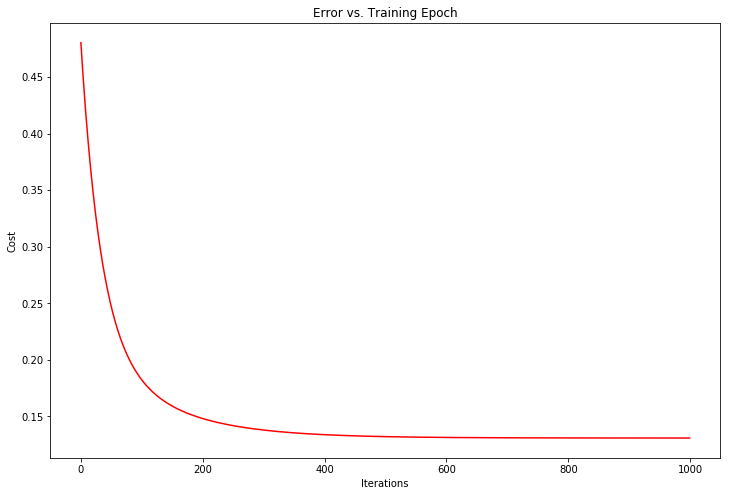

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()